In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
dfAccounts = pd.read_csv("Accounts.txt")
dfProjects = pd.read_csv("Projects.txt")
dfEmployees = pd.read_csv("Employees.txt")

In [127]:
dfAccounts

,Date,number,Reg Number,Worked Hours
0,04/11/2022,1,3455398476,20
1,11/10/2022,2,5479347498,15
2,10/10/2022,3,2097324870,18
3,27/10/2022,4,9873450825,19


In [128]:
dfProjects

,number,name
0,1,ProjectOne
1,2,ProjectTwo
2,3,ProjectThree
3,4,ProjectFour
4,1,ProjectOne


In [129]:
dfEmployees

,Surname,Reg Number,pay per hour
0,Masnyk,3455398476,40
1,Borovets,5479347498,60
2,Zelenko,2097324870,35
3,Kaparys,9873450825,36


In [78]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [79]:
display('dfAccounts', 'dfProjects', 'pd.merge(dfAccounts,dfProjects)')

dfAccounts
         Date  number  Reg Number  Worked Hours
0  04/11/2022       1  3455398476            20
1  11/10/2022       2  5479347498            15
2  10/10/2022       3  2097324870            18
3  27/10/2022       4  9873450825            19

dfProjects
   number           name
0       1     ProjectOne
1       2     ProjectTwo
2       3   ProjectThree
3       4    ProjectFour
4       1     ProjectOne

pd.merge(dfAccounts,dfProjects)
         Date  number  Reg Number  Worked Hours           name
0  04/11/2022       1  3455398476            20     ProjectOne
1  04/11/2022       1  3455398476            20     ProjectOne
2  11/10/2022       2  5479347498            15     ProjectTwo
3  10/10/2022       3  2097324870            18   ProjectThree
4  27/10/2022       4  9873450825            19    ProjectFour

In [92]:
dfres = dfAccounts.merge( dfProjects)
dfres


,Date,number,Reg Number,Worked Hours,name
0,04/11/2022,1,3455398476,20,ProjectOne
1,04/11/2022,1,3455398476,20,ProjectOne
2,11/10/2022,2,5479347498,15,ProjectTwo
3,10/10/2022,3,2097324870,18,ProjectThree
4,27/10/2022,4,9873450825,19,ProjectFour


In [99]:
dfres2 = dfres.drop(columns=['Date', 'number', 'Reg Number'], axis=1)
dfres2

,Worked Hours,name
0,20,ProjectOne
1,20,ProjectOne
2,15,ProjectTwo
3,18,ProjectThree
4,19,ProjectFour


In [121]:
dfres3=dfres2.groupby('name')
dfres3.sum()


,Worked Hours
name,
ProjectFour,19
ProjectOne,40
ProjectThree,18
ProjectTwo,15


In [120]:
plt.plot(dfres3["Worked Hours"]["name"].plot(kind = 'bar'))

IndexError: Column(s) Worked Hours already selected

C:\Users\user\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


TypeError: unhashable type: 'numpy.ndarray'

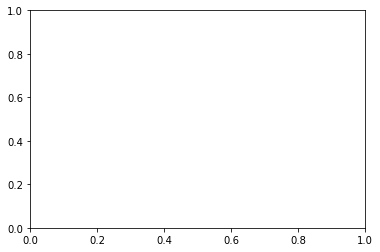

In [118]:
plt.plot(dfres3["Worked Hours"],dfres3["name"])

In [131]:
df_worker_data=dfAccounts.merge(dfEmployees)
df_worker_data

,Date,number,Reg Number,Worked Hours,Surname,pay per hour
0,04/11/2022,1,3455398476,20,Masnyk,40
1,11/10/2022,2,5479347498,15,Borovets,60
2,10/10/2022,3,2097324870,18,Zelenko,35
3,27/10/2022,4,9873450825,19,Kaparys,36


In [132]:
df_worker_data['total salary'] = df_worker_data['Worked Hours']*df_worker_data['pay per hour']
df_worker_data

,Date,number,Reg Number,Worked Hours,Surname,pay per hour,total salary
0,04/11/2022,1,3455398476,20,Masnyk,40,800
1,11/10/2022,2,5479347498,15,Borovets,60,900
2,10/10/2022,3,2097324870,18,Zelenko,35,630
3,27/10/2022,4,9873450825,19,Kaparys,36,684


In [ ]:
df_worker_data=df_worker_data.drop(columns=['Date', 'number', 'Reg Number'], axis=1)